In [31]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import operator
import math
import functools
import scipy.io


In [111]:
# Data generation for toy problem
# data = [[[(i + j)/100] for j in range(5)] for i in range(100)]
# data = np.array(data, dtype=float)
# target = [(i+5)/100 for i in range(100)]
# target = np.array(target, dtype=float)

# loop through all files to extract ROI time-series from each patients
subjects = []
for i in range(1,143):
    fileName = 'sub_'+str(i)+'.mat'
    file = scipy.io.loadmat(fileName)
    subjects.append(file['tc_filt'])  
subjects = np.asarray(subjects)

In [112]:
print(subjects.shape)

(142, 156, 160)


For a single patient (patient 1), lets try to predict the next time point given 5 samples.

In [168]:
# Normalize Data
subject_1_data = np.asarray(subjects[26, :, 58])
mean = np.mean(subject_1_data)
std = np.std(subject_1_data)
subject_1_data = (subject_1_data - mean) / std

# Pre-process
timepoints = 10 # Number of timepoints for the model to look backwards
subject_1_data_x = np.asarray([subject_1_data[i:i+timepoints] for i in range(subject_1_data.shape[0] - timepoints - 1)])
subject_1_data_y = np.asarray([(subject_1_data[i+timepoints+1:i+timepoints+2] - subject_1_data[i+timepoints:i+timepoints+1])\
                               / (subject_1_data[i+timepoints+1:i+timepoints+2]) for i in range(subject_1_data.shape[0] - timepoints - 1)])

#Round Data 
subject_1_data_y = np.round(subject_1_data_y, 0)

# Reshape Data 
print(subject_1_data_x.shape)
print(subject_1_data_y.shape)
subject_1_data_x = np.reshape(subject_1_data_x, (subject_1_data_x.shape[0], subject_1_data_x.shape[1], 1))
subject_1_data_y = np.reshape(subject_1_data_y, (subject_1_data_y.shape[0],))
print(subject_1_data_x.shape)
print(subject_1_data_y.shape)

(145, 10)
(145, 1)
(145, 10, 1)
(145,)


In [169]:
x_train, x_test, y_train, y_test = train_test_split(subject_1_data_x, subject_1_data_y, test_size=0.2, random_state=4)
# x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4) # Split for toy problem

In [175]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(116, 10, 1) (29, 10, 1) (116,) (29,)


In [171]:
# Build LSTM Model
model = Sequential()  
model.add(LSTM((1), batch_input_shape=(None, timepoints, 1), return_sequences=True))
model.add(LSTM((1), dropout=0.2, return_sequences=True))
model.add(LSTM((1), return_sequences=False))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=500, verbose=2,validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_94 (LSTM)               (None, 10, 1)             12        
_________________________________________________________________
lstm_95 (LSTM)               (None, 10, 1)             12        
_________________________________________________________________
lstm_96 (LSTM)               (None, 1)                 12        
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________
Train on 116 samples, validate on 29 samples
Epoch 1/500
 - 18s - loss: 6.5813 - acc: 0.4569 - val_loss: 1.6495 - val_acc: 0.3793
Epoch 2/500
 - 0s - loss: 6.5799 - acc: 0.4569 - val_loss: 1.6480 - val_acc: 0.3793
Epoch 3/500
 - 0s - loss: 6.5798 - acc: 0.4569 - val_loss: 1.6472 - val_acc: 0.3793
Epoch 4/500
 - 0s - loss: 6.5747 - acc: 0.4569 - val_loss: 1.6460 - val_acc: 0.3793
Epoch 5/500
 - 0s - loss: 6.

Epoch 89/500
 - 0s - loss: 6.5103 - acc: 0.4569 - val_loss: 1.6093 - val_acc: 0.3793
Epoch 90/500
 - 0s - loss: 6.5087 - acc: 0.4569 - val_loss: 1.6094 - val_acc: 0.3793
Epoch 91/500
 - 0s - loss: 6.5146 - acc: 0.4569 - val_loss: 1.6094 - val_acc: 0.3793
Epoch 92/500
 - 0s - loss: 6.5176 - acc: 0.4569 - val_loss: 1.6095 - val_acc: 0.3793
Epoch 93/500
 - 0s - loss: 6.5191 - acc: 0.4569 - val_loss: 1.6095 - val_acc: 0.3793
Epoch 94/500
 - 0s - loss: 6.5106 - acc: 0.4569 - val_loss: 1.6096 - val_acc: 0.3793
Epoch 95/500
 - 0s - loss: 6.5120 - acc: 0.4569 - val_loss: 1.6097 - val_acc: 0.3793
Epoch 96/500
 - 0s - loss: 6.5130 - acc: 0.4569 - val_loss: 1.6097 - val_acc: 0.3793
Epoch 97/500
 - 0s - loss: 6.5255 - acc: 0.4569 - val_loss: 1.6098 - val_acc: 0.3793
Epoch 98/500
 - 0s - loss: 6.5104 - acc: 0.4569 - val_loss: 1.6098 - val_acc: 0.3793
Epoch 99/500
 - 0s - loss: 6.5122 - acc: 0.4569 - val_loss: 1.6099 - val_acc: 0.3793
Epoch 100/500
 - 0s - loss: 6.5098 - acc: 0.4569 - val_loss: 1.60

Epoch 185/500
 - 0s - loss: 6.4969 - acc: 0.4569 - val_loss: 1.6195 - val_acc: 0.3793
Epoch 186/500
 - 0s - loss: 6.5009 - acc: 0.4569 - val_loss: 1.6197 - val_acc: 0.3793
Epoch 187/500
 - 0s - loss: 6.5022 - acc: 0.4569 - val_loss: 1.6201 - val_acc: 0.3793
Epoch 188/500
 - 0s - loss: 6.5022 - acc: 0.4569 - val_loss: 1.6204 - val_acc: 0.3793
Epoch 189/500
 - 0s - loss: 6.4986 - acc: 0.4569 - val_loss: 1.6207 - val_acc: 0.3793
Epoch 190/500
 - 0s - loss: 6.5274 - acc: 0.4569 - val_loss: 1.6208 - val_acc: 0.3793
Epoch 191/500
 - 0s - loss: 6.4808 - acc: 0.4569 - val_loss: 1.6209 - val_acc: 0.3793
Epoch 192/500
 - 0s - loss: 6.5051 - acc: 0.4569 - val_loss: 1.6210 - val_acc: 0.3793
Epoch 193/500
 - 0s - loss: 6.4935 - acc: 0.4569 - val_loss: 1.6212 - val_acc: 0.3793
Epoch 194/500
 - 0s - loss: 6.4922 - acc: 0.4569 - val_loss: 1.6213 - val_acc: 0.3793
Epoch 195/500
 - 0s - loss: 6.4896 - acc: 0.4569 - val_loss: 1.6215 - val_acc: 0.3793
Epoch 196/500
 - 0s - loss: 6.5057 - acc: 0.4569 - val

Epoch 281/500
 - 0s - loss: 6.4636 - acc: 0.4569 - val_loss: 1.6954 - val_acc: 0.3793
Epoch 282/500
 - 0s - loss: 6.4997 - acc: 0.4569 - val_loss: 1.6965 - val_acc: 0.3793
Epoch 283/500
 - 0s - loss: 6.4531 - acc: 0.4569 - val_loss: 1.6976 - val_acc: 0.3793
Epoch 284/500
 - 0s - loss: 6.4437 - acc: 0.4569 - val_loss: 1.6989 - val_acc: 0.3793
Epoch 285/500
 - 0s - loss: 6.4708 - acc: 0.4569 - val_loss: 1.6998 - val_acc: 0.3793
Epoch 286/500
 - 0s - loss: 6.4181 - acc: 0.4569 - val_loss: 1.7012 - val_acc: 0.3793
Epoch 287/500
 - 0s - loss: 6.3872 - acc: 0.4569 - val_loss: 1.7031 - val_acc: 0.3793
Epoch 288/500
 - 0s - loss: 6.4283 - acc: 0.4569 - val_loss: 1.7045 - val_acc: 0.3793
Epoch 289/500
 - 0s - loss: 6.4314 - acc: 0.4569 - val_loss: 1.7066 - val_acc: 0.3793
Epoch 290/500
 - 0s - loss: 6.4267 - acc: 0.4569 - val_loss: 1.7098 - val_acc: 0.3793
Epoch 291/500
 - 0s - loss: 6.4091 - acc: 0.4569 - val_loss: 1.7122 - val_acc: 0.3793
Epoch 292/500
 - 1s - loss: 6.4722 - acc: 0.4569 - val

Epoch 377/500
 - 0s - loss: 6.5466 - acc: 0.3966 - val_loss: 1.8296 - val_acc: 0.3103
Epoch 378/500
 - 0s - loss: 6.4306 - acc: 0.3793 - val_loss: 1.8284 - val_acc: 0.3103
Epoch 379/500
 - 0s - loss: 6.4144 - acc: 0.3448 - val_loss: 1.8266 - val_acc: 0.3103
Epoch 380/500
 - 0s - loss: 6.4504 - acc: 0.3793 - val_loss: 1.8251 - val_acc: 0.3103
Epoch 381/500
 - 0s - loss: 6.3555 - acc: 0.3879 - val_loss: 1.8250 - val_acc: 0.3103
Epoch 382/500
 - 0s - loss: 6.3062 - acc: 0.3707 - val_loss: 1.8252 - val_acc: 0.3103
Epoch 383/500
 - 0s - loss: 6.3756 - acc: 0.3793 - val_loss: 1.8267 - val_acc: 0.3103
Epoch 384/500
 - 0s - loss: 6.3242 - acc: 0.3966 - val_loss: 1.8281 - val_acc: 0.3103
Epoch 385/500
 - 0s - loss: 6.4612 - acc: 0.3793 - val_loss: 1.8292 - val_acc: 0.3103
Epoch 386/500
 - 0s - loss: 6.3535 - acc: 0.3793 - val_loss: 1.8304 - val_acc: 0.3103
Epoch 387/500
 - 0s - loss: 6.4098 - acc: 0.3793 - val_loss: 1.8322 - val_acc: 0.3103
Epoch 388/500
 - 0s - loss: 6.4554 - acc: 0.3534 - val

Epoch 473/500
 - 0s - loss: 6.3657 - acc: 0.3879 - val_loss: 1.8859 - val_acc: 0.3103
Epoch 474/500
 - 0s - loss: 6.3319 - acc: 0.3793 - val_loss: 1.8873 - val_acc: 0.3103
Epoch 475/500
 - 0s - loss: 6.3136 - acc: 0.3793 - val_loss: 1.8886 - val_acc: 0.3103
Epoch 476/500
 - 0s - loss: 6.3613 - acc: 0.3707 - val_loss: 1.8898 - val_acc: 0.3103
Epoch 477/500
 - 0s - loss: 6.4798 - acc: 0.3879 - val_loss: 1.8903 - val_acc: 0.3103
Epoch 478/500
 - 0s - loss: 6.3473 - acc: 0.3707 - val_loss: 1.8903 - val_acc: 0.3103
Epoch 479/500
 - 1s - loss: 6.3541 - acc: 0.3707 - val_loss: 1.8906 - val_acc: 0.3103
Epoch 480/500
 - 0s - loss: 6.3280 - acc: 0.3793 - val_loss: 1.8910 - val_acc: 0.3103
Epoch 481/500
 - 1s - loss: 6.4546 - acc: 0.3534 - val_loss: 1.8909 - val_acc: 0.3103
Epoch 482/500
 - 1s - loss: 6.4208 - acc: 0.3621 - val_loss: 1.8906 - val_acc: 0.3103
Epoch 483/500
 - 1s - loss: 6.4269 - acc: 0.3793 - val_loss: 1.8906 - val_acc: 0.3103
Epoch 484/500
 - 0s - loss: 6.3633 - acc: 0.3793 - val

In [172]:
predict = model.predict(x_test)

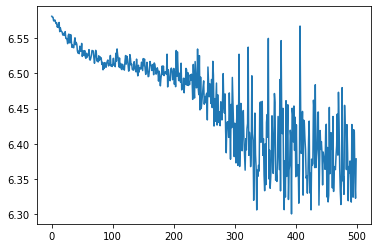

In [173]:
# Plot Loss
plt.plot(history.history['loss'])
plt.show()

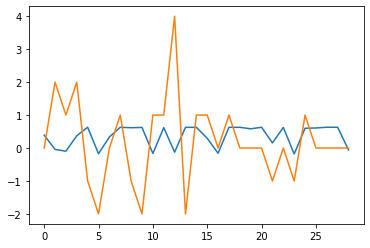

In [174]:
# Plot predictions vs actual
plt.plot(predict)
plt.plot(y_test)

ValueError: x and y must be the same size

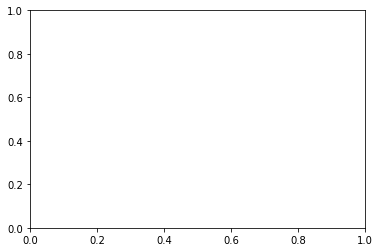

In [77]:
# Plots for toy problem
# plt.scatter(range(20), predict, c='r')
# plt.scatter(range(20), y_test, c='g')